### <center size=2> Real data example : Reconcavo Basin, Brazil <center> 
    

--------------------------------------------------------------------------------------------------------------------

In [1]:
#----------------------------- ALL INTERNAL PACKAGES --------------------------- #
import numpy as np
import ipywidgets as widgets
import scipy as sp
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import Latex
#from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import axes3d
from scipy.sparse import csc_matrix, spdiags, dia_matrix
from scipy.sparse.linalg import spsolve
#import pyproj
import utm

# <center> Etapa 01: Leitura dos dados de gravidade <center>

In [2]:
# ------------- Use pandas to read the real data -----------------:
# dados parcialmente interpolados na regiao do rifte abortado (RECOMENDACAO: LER LAT, LON): 
nome=['Lat','Lon', 'UTMe', 'UTMn', 'Boug', 'Elev']
data = pd.read_csv('GRAV_DEXBADEXES_med_proc.asc', sep=',', header=20, usecols=(2,3,4,5,7,12), names=nome, na_values= 9999.99 )

#name=['Lon','Lat', 'Boug']
#bndg= pd.read_csv('dados_bndg.asc', sep=',', header=17, usecols=(0,1,13), names=name, na_values= '*' )
#bndg

In [ ]:
# ------------- Use pandas to read the real data -----------------:
# dados parcialmente interpolados na regiao do rifte abortado (RECOMENDACAO: LER LAT, LON): 
nome=['UTMe', 'UTMn', 'Line', 'DZ',]
data = pd.read_csv('BOUG_RESIDUAL_Cont4000.xyz', sep='\s+', header=0, names=nome, na_values= 9999.99 )

#name=['Lon','Lat', 'Boug']
#bndg= pd.read_csv('dados_bndg.asc', sep=',', header=17, usecols=(0,1,13), names=name, na_values= '*' )
data

## 1.1: Leitura dos dados do ICGEM para a anomalia bouguer regional

In [ ]:
# dados parcialmente interpolados na regiao do rifte abortado (RECOMENDACAO: LER LAT, LON): 
nome=['Lon','Lat', 'Reg_Boug']
regional = pd.read_csv('Regional.dat', header=37, sep='\s+', usecols=(1,2,4), names=nome )

In [ ]:
regional

# <center> Etapa 02: Leitura das coordenadas dos dados de poço <center>

In [ ]:
# Leitura das coordenadas utm dos poços da bacia do reconcavo:
# dados parcialmente interpolados na regiao do rifte abortado (RECOMENDACAO: LER LAT, LON): 
label=['ID','Nome', 'UTMn', 'UTMe']
poco = pd.read_csv('INFO_POCOS2.txt', sep='\s+', header=0, usecols=(0,1,2,3), names=label, na_values=999.999 ) # 999.999 = dummy

In [ ]:
# lat lon dos poços computados pela funcao utm:
npo = len(poco)
print ('numero de pocos=', npo)
lon_poc = np.zeros(npo)
lat_poc = np.zeros(npo)

for i in range(npo):
    lat_poc[i], lon_poc[i] = utm.to_latlon(poco['UTMe'][i], poco['UTMn'][i],zone_number=24, zone_letter='K' )

# adicionando as colunas 'Lat' e 'Lon' no dataframe poco:
poco['Lon'] = lon_poc
poco['Lat'] = lat_poc    


# <center> Etapa 03: Leitura das coordenadas das linhas sismicas <center>

In [ ]:
# Leitura das coordenadas utm de algumas linhas sismicas da bacia do reconcavo:
#line = ['linha', 'w0', 's0', 'wf', 'sf']
#sis = pd.read_csv('loc_sismica.txt', sep='\s+', header=0 ) # 999.999 = dummy
sis = pd.read_csv('NOVO_INFO_SISMICA.csv', sep=',', header=0 ) # 999.999 = dummy

In [ ]:
# conversao para grau decimal (dados em grau,minuto,segundo):
lon0 = -(sis['wg0'] + sis['wm0']/60.0 + sis['ws0']/3600.0)
lat0 = -(sis['sg0'] + sis['sm0']/60.0 + sis['ss0']/3600.0)

lonf = -(sis['wgf'] + sis['wmf']/60.0 + sis['wsf']/3600.0)
latf = -(sis['sgf'] + sis['smf']/60.0 + sis['ssf']/3600.0)
lat0
sis

In [ ]:
# plot das linhas sismicas lidas do arquivo:
nlines = len(lat0)
ys=np.zeros(3)
xs=np.zeros (3)
for i in range(0, nlines, 1):
    ys = [ lat0[i], latf[i] ]
    xs = [ lon0[i], lonf[i] ]
    plt.plot(xs, ys,'.-')
plt.show()
np.array(xs)
np.array(ys)
xs

# <center> Etapa 04: Visualização dos dados : <center>

In [ ]:
# ------------ plot the flight lines to check for the interpolation:--------#
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,12), facecolor='w')
plt.subplot(121)
#plt.title('Dado de Gravidade - Bacia do Reconcavo',fontsize=15)
plt.xlabel('Longitude($^o$)', fontsize = 15)
plt.ylabel('Latitude($^o$)', fontsize = 15)
p1 = plt.scatter(data['Lon'], data['Lat'], s=1.0, c=data['Boug'], marker='.', cmap=plt.cm.jet)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Anomalia Bouguer Total $ (mGal) $',fontsize=15, rotation = 0)
plt.grid()
#plt.savefig('figs finais/Python/anomalia_total.png', dpi=300, transparent=True, bbox_inches="tight" )

#################################################################################
plt.subplot(122)
#plt.title('Dado de Gravidade - Bacia do Reconcavo',fontsize=15)
plt.xlabel('Longitude($^o$)', fontsize = 15)
plt.ylabel('Latitude($^o$)', fontsize = 15)
p2 = plt.scatter(regional['Lon'], regional['Lat'], s=1.0, c=regional['Reg_Boug'], marker='.', cmap=plt.cm.jet)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Anomalia Bouguer bndg $ (mGal) $',fontsize=15, rotation = 0)
plt.grid()
#plt.savefig('figs finais/Python/anomalia_total.png', dpi=300, transparent=True, bbox_inches="tight" )

plt.grid()
#plt.savefig('Separacao.png', dpi=300, transparent=True, bbox_inches="tight" )


plt.show()

#  <center size=3> Etapa 06: Remoção do Regional da Anomalia Bouguer: <center>

## 6.1: via ajuste polinomial

In [3]:
# create a polinomial data:
xp   = data['Lon']
yp   = data['Lat']
bou  = data['Boug']
ndat = len(xp)
one  = np.ones(ndat)

In [4]:
# utilizando um polinomio de grau 6:
S = np.array( [ one, xp, yp, xp**2, yp**2, xp**3, yp**3, xp**4, yp**4, xp**5, yp**5, xp**6, yp**6])
#print (type(S))
# transposta para arrumar a matrix corretamente:
A = S.T

In [5]:
# estimativa de minimos quadrados para obter os coeficientes do polinomio:
p = np.linalg.solve(np.dot(A.T,A) , np.dot(A.T,bou) )
print (p)

[-1.88054664e+07 -7.79695427e+05 -6.31861682e+04  2.10936657e+04
 -1.20911580e+04  9.29405247e+02 -1.20731501e+03 -2.20434518e+01
 -6.63555108e+01 -1.09763609e+00 -1.90494377e+00 -1.04374103e-02
 -2.23451094e-02]


In [6]:
# calculo dos dados preditos pelo modelo polinomial:
bou_pred = np.dot(A,p)

In [7]:
# calculo da anomalia bouguer residual via modelo polinomial:
residual = bou - bou_pred
# incorporar ao dataframe:
data['Boug_residual'] = residual
data['Boug_regional'] = bou_pred

In [8]:
data

,Lat,Lon,UTMe,UTMn,Boug,Elev,Boug_residual,Boug_regional
0,-18.48058,-40.46648,345166.38913,7.956008e+06,-7.58,NaN,131.736405,-139.316405
1,-18.55034,-40.45372,346576.06519,7.948299e+06,-25.34,NaN,105.020942,-130.360942
2,-18.54475,-40.45178,346775.85840,7.948919e+06,-23.43,NaN,105.900555,-129.330555
3,-18.53845,-40.44888,347076.37556,7.949619e+06,-22.76,NaN,105.001024,-127.761024
4,-18.56134,-40.44472,347535.84760,7.947089e+06,-22.31,NaN,102.605378,-124.915378
5,-18.57426,-40.44473,347546.27534,7.945659e+06,-21.33,NaN,103.339219,-124.669219
6,-18.52539,-40.44366,347615.84260,7.951069e+06,-22.34,NaN,102.660218,-125.000218
7,-18.56986,-40.44166,347866.38578,7.946149e+06,-22.27,NaN,100.728757,-122.998757
8,-18.52018,-40.43982,348016.63475,7.951648e+06,-22.38,NaN,100.531083,-122.911083
9,-18.56411,-40.43773,348276.09008,7.946788e+06,-22.66,NaN,98.223352,-120.883352


##  6.2:  via ICGEM (dados de satélite)

In [ ]:
Bou_res = data.Boug - regional.Reg_Boug
data['Boug_res'] = np.array(Bou_res)

In [ ]:
data

##  6.3:  via polinomial robusto 

In [9]:
# Uso do polinomio simples como entrada
p2 = p.copy()
bou_pred2 = bou_pred.copy()
M = len(bou)

In [10]:
# Quantidade de iteracoes
iteracoes = 30

In [11]:
# Calculo do polinomio robusto
for i in range(iteracoes):
    r = bou - bou_pred2
    w = 1./np.abs(r + 1.e-6)
    W = spdiags(w,0,M,M)
    A = csc_matrix(A)
    W = A.T @ W
    p2 = spsolve(W @ A, W @ r)
    bou_pred2 = A @ p2

In [12]:
residual2= bou - bou_pred2
data['Boug_residual_robusto'] = residual2

In [13]:
data

,Lat,Lon,UTMe,UTMn,Boug,Elev,Boug_residual,Boug_regional,Boug_residual_robusto
0,-18.48058,-40.46648,345166.38913,7.956008e+06,-7.58,NaN,131.736405,-139.316405,-35.147965
1,-18.55034,-40.45372,346576.06519,7.948299e+06,-25.34,NaN,105.020942,-130.360942,-52.310978
2,-18.54475,-40.45178,346775.85840,7.948919e+06,-23.43,NaN,105.900555,-129.330555,-50.051159
3,-18.53845,-40.44888,347076.37556,7.949619e+06,-22.76,NaN,105.001024,-127.761024,-48.893531
4,-18.56134,-40.44472,347535.84760,7.947089e+06,-22.31,NaN,102.605378,-124.915378,-48.264111
5,-18.57426,-40.44473,347546.27534,7.945659e+06,-21.33,NaN,103.339219,-124.669219,-47.491251
6,-18.52539,-40.44366,347615.84260,7.951069e+06,-22.34,NaN,102.660218,-125.000218,-47.574294
7,-18.56986,-40.44166,347866.38578,7.946149e+06,-22.27,NaN,100.728757,-122.998757,-47.960759
8,-18.52018,-40.43982,348016.63475,7.951648e+06,-22.38,NaN,100.531083,-122.911083,-47.030014
9,-18.56411,-40.43773,348276.09008,7.946788e+06,-22.66,NaN,98.223352,-120.883352,-47.751110


## <center size=3> Etapa 06: Visualização da anomalia Bouguer regional e residual: <center>

## 6.1: Via ajuste polinomial

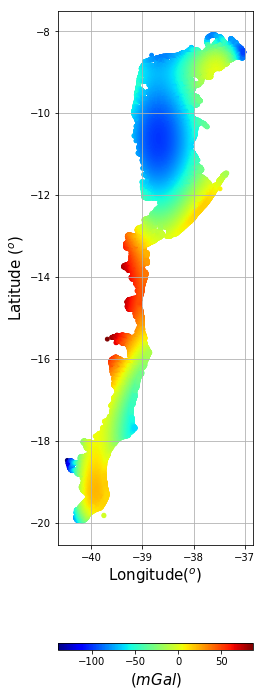

In [14]:
# Plot residual bouguer anomaly:
plt.close('all')

plt.figure(figsize=(3.5,12), facecolor='w')

#plt.title(' Anomalia Bouguer Regional ',fontsize=15)
plt.xlabel('Longitude($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
p1 = plt.scatter(data['Lon'], data['Lat'], s=60.0, c=data['Boug_regional'], marker='.', cmap=plt.cm.jet)
cbar =plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$ (mGal) $',fontsize=15, rotation = 0)
plt.grid()
#plt.savefig('figs finais/Python/anom_regional2.png', dpi=300, transparent=True, bbox_inches="tight" )

plt.show()

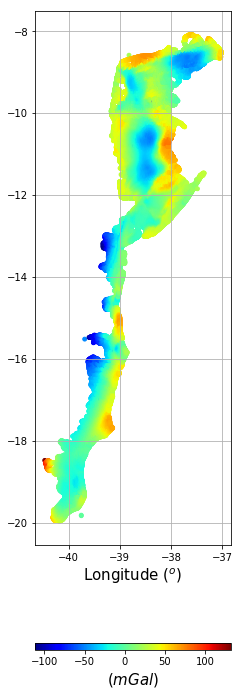

In [16]:
#plt.title(' Anomalia Bouguer Residual',fontsize=15)
plt.figure(figsize= (3.5,12), facecolor='w')
plt.xlabel('Longitude ($^o$)', fontsize = 15)
p2 = plt.scatter(data['Lon'], data['Lat'], s=60.0, c=data['Boug_residual'], marker='.', cmap=plt.cm.jet, )
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$ (mGal) $',fontsize=15,rotation = 0)
plt.grid()
#plt.savefig('figs finais/Python/anom_residual2.png', dpi=300, transparent=True, bbox_inches="tight" )

plt.show()

## 6.2: Via ajuste polinomial robusto

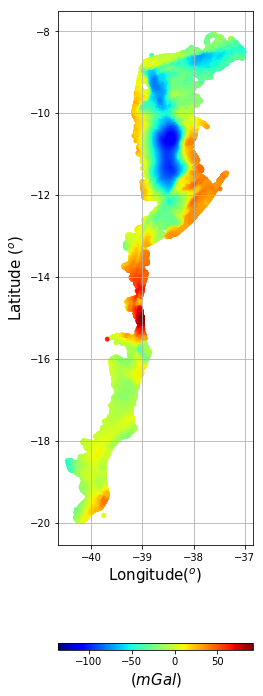

In [17]:
# Plot residual bouguer anomaly:
plt.close('all')

plt.figure(figsize=(3.5,12), facecolor='w')

#plt.title(' Anomalia Bouguer Regional ',fontsize=15)
plt.xlabel('Longitude($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
p1 = plt.scatter(data['Lon'], data['Lat'], s=60.0, c=data['Boug_residual_robusto'], marker='.', cmap=plt.cm.jet)
cbar =plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$ (mGal) $',fontsize=15, rotation = 0)
plt.grid()
#plt.savefig('figs finais/Python/anom_residual_robusto6.png', dpi=300, transparent=True, bbox_inches="tight" )

plt.show()

## Delimitação da área à Bacia do Recôncavo

In [18]:
# Dado grav:
# longitude filter:
reconcavo = data.loc[ (data['Lon']<= -38.00) & (data['Lon']>= -39.0) ] # should have the whitespace " LONG" !
# latitude filter:
rec = reconcavo.loc[ (reconcavo['Lat']<= -12.0) & (reconcavo['Lat']>= -13.00) ]
# check if is right:
rec.max(), rec.min()

(Lat                     -1.200010e+01
 Lon                     -3.800001e+01
 UTMe                     6.088567e+05
 UTMn                     8.673395e+06
 Boug                     4.438000e+01
 Elev                     3.646600e+02
 Boug_residual            4.892914e+01
 Boug_regional            1.449332e+01
 Boug_residual_robusto    4.548896e+01
 dtype: float64, Lat                     -1.300000e+01
 Lon                     -3.899981e+01
 UTMe                     5.000206e+05
 UTMn                     8.562838e+06
 Boug                    -6.401000e+01
 Elev                    -4.800000e-01
 Boug_residual           -2.713375e+01
 Boug_regional           -5.712974e+01
 Boug_residual_robusto   -5.256199e+01
 dtype: float64)

## Comparação dos dados BDEP cm dados BNDG

In [ ]:
# ------------ plot the flight lines to check for the interpolation:--------#
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,12), facecolor='w')
plt.subplot(121)
#plt.title('Dado de Gravidade - Bacia do Reconcavo',fontsize=15)
plt.xlabel('Longitude($^o$)', fontsize = 15)
plt.ylabel('Latitude($^o$)', fontsize = 15)
p1 = plt.scatter(rec['Lon'], rec['Lat'], s=1.0, c=rec['Boug'], marker='.', cmap=plt.cm.jet)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Anomalia Bouguer Total $ (mGal) $',fontsize=15, rotation = 0)
plt.grid()
#plt.savefig('figs finais/Python/anomalia_total.png', dpi=300, transparent=True, bbox_inches="tight" )

#################################################################################
plt.subplot(122)
#plt.title('Dado de Gravidade - Bacia do Reconcavo',fontsize=15)
plt.xlabel('Longitude($^o$)', fontsize = 15)
plt.ylabel('Latitude($^o$)', fontsize = 15)
p2 = plt.scatter(bndg['Lon'], bndg['Lat'], s=10.0, c=bndg['Boug'], marker='.', cmap=plt.cm.jet)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Anomalia Bouguer BNDG $ (mGal) $',fontsize=15, rotation = 0)
plt.grid()
#plt.savefig('figs finais/Python/anomalia_total.png', dpi=300, transparent=True, bbox_inches="tight" )
#plt.savefig('Separacao.png', dpi=300, transparent=True, bbox_inches="tight" )


plt.show()

## Visualização georreferenciada (Basemap)

In [ ]:
# ------------------------- Define the center of the map -----------------------------------#  
lo0 = 0.5*( rec['Lon'].max() + rec['Lon'].min() )
la0 = 0.5*( rec['Lat'].max() + rec['Lat'].max() )

# ------- use basemap function to create the plot : ---------# 
m = Basemap(llcrnrlon=-39.0, llcrnrlat=-13.0,
            urcrnrlon=-38.0, urcrnrlat=-12.0, 
            resolution='l',projection='tmerc', 
            lon_0=lo0, lat_0=la0,epsg=29100)

In [ ]:
lons, lats = m( np.array( rec['Lon'] ), np.array( rec['Lat']) )

In [ ]:
# ------------ set figure size: ------------------------------------------#
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(15,15), facecolor='w')

#----------Drawing Lat Long: -------------#
m.drawmeridians( range( 0,360,1), labels=[0, 1, 0, 1], latmax=rec['Lat'].min() )
m.drawparallels( range(-90,90,1), labels=[1, 0, 1, 0], latmax=rec['Lat'].max() )
m.drawmapscale(-38.1, -12.85, 3, 3, 10.0, units='km', barstyle='simple', fontcolor='k')

#------------------Loading Shapefiles---------------#
#m.readshapefile('brazil_shapefile/BRA_adm0', 'Brasil', drawbounds=True, linewidth=1)
#m.readshapefile('Real/shapes/MatoGrossodoSul', 'MatoGrossodoSul', drawbounds=True, linewidth=1)
#m.readshapefile('Real/shapes/Parana', 'Parana', drawbounds=True, linewidth=1)
#m.readshapefile('shapeFiles/bacias/Limite_das_Bacias_Sedimentares', 'Limite_das_Bacias_Sedimentares', 
            #    drawbounds=True, linewidth=1)
#m.readshapefile('shapeFiles/CAMPOS_PRODUCAO_191118', 'CAMPOS_PRODUCAO_191118', drawbounds=True, linewidth=0.5)


#--------------Background satellite image options-----------#

#m.shadedrelief(scale=1)
#m.etopo(scale=2)
#m.bluemarble(scale=0.5)
#m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=1000, ypixels=1000, verbose=True)
m.arcgisimage(service='World_Shaded_Relief', xpixels=1000, ypixels=1000, verbose= True)


#------------------Mapa da Anomalia------------------#
k = m.scatter(lons, lats, s=5.0, c=rec['Boug_residual'], marker='o', cmap=plt.cm.jet, latlon=False)
#----- colorbar specifications -----:
cbar = m.colorbar(k, location='right', size="5%", pad="5%")
cbar.set_label('Anomalia Bouguer Residual $ (mGal) $',fontsize=13, rotation=90)
#plt.savefig('figs finais/Python/mapa_bacia_residual.png', dpi=300, transparent=True, bbox_inches="tight" )


## 6.2: via ICGEM

In [ ]:
# Dado grav:
# longitude filter:
reconcavo = data.loc[ (data['Lon']<= -38.00) & (data['Lon']>= -39.0) ] # should have the whitespace " LONG" !
# latitude filter:
rec = reconcavo.loc[ (reconcavo['Lat']<= -12.0) & (reconcavo['Lat']>= -13.00) ]
# check if is right:
rec.max(), rec.min()

In [ ]:
# ------------------------- Define the center of the map -----------------------------------#  
lo0 = 0.5*( rec['Lon'].max() + rec['Lon'].min() )
la0 = 0.5*( rec['Lat'].max() + rec['Lat'].max() )

# ------- use basemap function to create the plot : ---------# 
m = Basemap(llcrnrlon=-39.0, llcrnrlat=-13.0,
            urcrnrlon=-38.0, urcrnrlat=-12.0, 
            resolution='l',projection='tmerc', 
            lon_0=lo0, lat_0=la0,epsg=29100)

In [ ]:
# referenciando as coordenadas grav, sismica e poco ao mapa:
lons, lats = m( np.array( rec['Lon'] ), np.array( rec['Lat']) )

In [ ]:
# ------------ set figure size: ------------------------------------------#
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(15,15), facecolor='w')

#----------Drawing Lat Long: -------------#
m.drawmeridians( range( 0,360,1), labels=[0, 1, 0, 1], latmax=rec['Lat'].min() )
m.drawparallels( range(-90,90,1), labels=[1, 0, 1, 0], latmax=rec['Lat'].max() )
m.drawmapscale(-38.1, -12.85, 3, 3, 10.0, units='km', barstyle='simple', fontcolor='k')

#------------------Loading Shapefiles---------------#
#m.readshapefile('brazil_shapefile/BRA_adm0', 'Brasil', drawbounds=True, linewidth=1)
#m.readshapefile('Real/shapes/MatoGrossodoSul', 'MatoGrossodoSul', drawbounds=True, linewidth=1)
#m.readshapefile('Real/shapes/Parana', 'Parana', drawbounds=True, linewidth=1)
#m.readshapefile('shapeFiles/bacias/Limite_das_Bacias_Sedimentares', 'Limite_das_Bacias_Sedimentares', 
              #  drawbounds=True, linewidth=1)
#m.readshapefile('shapeFiles/CAMPOS_PRODUCAO_191118', 'CAMPOS_PRODUCAO_191118', drawbounds=True, linewidth=0.5)


#--------------Background satellite image options-----------#

#m.shadedrelief(scale=1)
#m.etopo(scale=2)
#m.bluemarble(scale=0.5)
#m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=1000, ypixels=1000, verbose=True)
m.arcgisimage(service='World_Shaded_Relief', xpixels=1000, ypixels=1000, verbose= True)



#------------------Mapa da Anomalia------------------#
k = m.scatter(lons, lats, s=5.0, c=rec['Boug_res'], marker='o', cmap=plt.cm.jet, latlon=False)
#----- colorbar specifications -----:
cbar = m.colorbar(k, location='right', size="2%", pad="2%")
cbar.set_label('Anomalia Bouguer Total $ (mGal) $',fontsize=20, rotation=90)
#plt.savefig('figs finais/Python/mapa_bacia.png', dpi=300, transparent=True, bbox_inches="tight" )

#  <center> Etapa 07: Delimitação da área de estudo ao compartimento sul:

In [19]:
# Dado grav:
# longitude filter:
target = data.loc[ (data['Lon']<= -38.00) & (data['Lon']>= -39.2) ] # should have the whitespace " LONG" !
# latitude filter:
target = target.loc[ (target['Lat']<= -12.5) & (target['Lat']>= -12.75) ]
# check if is right:
target.max(), target.min()

(Lat                     -1.250002e+01
 Lon                     -3.800002e+01
 UTMe                     6.086403e+05
 UTMn                     8.618138e+06
 Boug                     4.397000e+01
 Elev                     2.359800e+02
 Boug_residual            3.546974e+01
 Boug_regional            1.449332e+01
 Boug_residual_robusto    3.843826e+01
 dtype: float64, Lat                     -1.274996e+01
 Lon                     -3.898047e+01
 UTMe                     5.021200e+05
 UTMn                     8.590412e+06
 Boug                    -4.445000e+01
 Elev                    -4.800000e-01
 Boug_residual           -2.516471e+01
 Boug_regional           -2.958368e+01
 Boug_residual_robusto   -3.303825e+01
 dtype: float64)

In [20]:
target

,Lat,Lon,UTMe,UTMn,Boug,Elev,Boug_residual,Boug_regional,Boug_residual_robusto
18299,-12.74612,-38.98047,502119.99957,8.590935e+06,-14.98,205.84,-12.718723,-2.261277,7.767442
18493,-12.74238,-38.97525,502686.67484,8.591348e+06,-15.69,213.21,-12.819455,-2.870545,6.850255
18734,-12.60593,-38.97005,503252.87855,8.606437e+06,-20.55,8.59,-9.875341,-10.674659,4.771897
18765,-12.74194,-38.96930,503332.56813,8.591397e+06,-15.98,207.30,-12.625701,-3.354299,6.239160
18862,-12.60031,-38.96702,503582.04585,8.607059e+06,-21.41,4.50,-10.194219,-11.215781,3.870324
18925,-12.74103,-38.96579,503713.60143,8.591497e+06,-16.66,195.83,-12.988943,-3.671057,5.384752
18961,-12.61268,-38.96481,503821.89651,8.605691e+06,-21.48,8.58,-10.775948,-10.704052,3.398907
19028,-12.62151,-38.96317,503999.87567,8.604714e+06,-20.80,33.51,-10.456286,-10.343714,3.788988
19039,-12.63056,-38.96315,504001.90705,8.603714e+06,-21.84,13.53,-11.990528,-9.849472,2.543896
19083,-12.67371,-38.96209,504116.33145,8.598942e+06,-20.45,79.42,-12.872862,-7.577138,2.903075


In [ ]:
# Dado poco:
# longitude filter:
poco = poco.loc[ (poco['Lon']<= -38.4) & (poco['Lon']>= -38.90) ] # should have the whitespace " LONG" !
# latitude filter:
poco = poco.loc[ (poco['Lat']<= -12.50) & (poco['Lat']>= -12.7) ]
# check if is right:
poco.max(), poco.min()

In [ ]:
ipoco = poco.index.tolist()
print (ipoco[0])

## <center size=3> Etapa 08: Plot da Anomalia residual, as linhas sismicas e os poços: <center>

In [ ]:

# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(12,4), facecolor='w')

plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
p1 = plt.scatter(target['Lon'], target['Lat'], s=60.0, c=target['Boug_residual'], marker='.', cmap=plt.cm.jet)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('Anomalia Bouguer Residual $ (mGal) $',fontsize=15, rotation = 90)

# plot das linhas sismicas:
for i in range(0,2,1):
    ys[i] = [lat0[i], latf[i]]
    xs[i] = [lon0[i], lonf[i]]
    plt.plot(xs[i], ys[i], marker='.', linestyle='solid', linewidth=3.0, markersize=0, label=sis['LINHA'][i] )    

#plot dos pocos:
for k in range(0, len(poco), 1 ):
    i = ipoco[k] 
    plt.plot(poco['Lon'][i], poco['Lat'][i], marker='*', linestyle='None', linewidth=3.0, markersize=15, label=poco['Nome'][i] )

plt.legend(loc=2)

###########################################################################################################################
#plt.savefig('figs finais/Python/area_estudo_multigeofisico.png', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [ ]:
np.shape(ys)

## <center> Etapa 9: Definicao do perfil gravimétrico a partir do banco de dados pre-filtrados: <center>

In [21]:
# bibliotecas externas:
from modules.grids import profile

In [22]:
# construcao dos pontos inicial e final do perfil em funcao da linha sismica:


p1=(-38.87, -12.55) #ponto na borda flexural da bacia (VAI FAZER A BACIA AFLORAR EM Z=0)

p2= (-38.18, -12.675) #ponto na borda de falha da bacia 


In [23]:
# calculo do tamanho do perfil

p1_m = utm.from_latlon(-38.87,-12.55, force_zone_number=24)
p2_m= utm.from_latlon(-38.18,-12.675, force_zone_number=24)

dist= (((p1_m[0]-p2_m[0])**2 +(p1_m[1]-p2_m[1])**2)**(0.5))/1000 #distancia em Km
#dist
p1_m
p2_m

(2823033.377007486, 5430683.264749841, 24)

In [24]:
size = int(np.size(target['Boug']) * 10.0/100.0 )
size

914

In [25]:
perfil = profile(target['Lon'], target['Lat'], target['Boug_residual'], p1, p2, size)

In [26]:
perfil_robusto=profile(target['Lon'], target['Lat'], target['Boug_residual_robusto'], p1, p2, size)

## Conversão de coordenadas geográficas para UTM:

In [27]:
# calculando a conversao dos dados do perfil para utm:
N_perf = np.zeros(size)
E_perf = np.copy(N_perf)

for i in range(size):
    # N = north, E = East
    #print (i)
    XXX = utm.from_latlon( perfil[1][i], perfil[0][i], force_zone_number=24 )
    N_perf[i], E_perf[i] = XXX[1], XXX[0] 

In [28]:
# calculando a conversao dos dados do perfil ROBUSTO para utm:
N_perf_robusto = np.zeros(size)
E_perf_robusto = np.copy(N_perf_robusto)

for i in range(size):
    # N = north, E = East
    #print (i)
    XXX = utm.from_latlon( perfil_robusto[1][i], perfil_robusto[0][i], force_zone_number=24 )
    N_perf_robusto[i], E_perf_robusto[i] = XXX[1], XXX[0] 

### Visualização:

In [ ]:
 # ------------ plot the flight lines to check for the interpolation:--------#
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(12,4), facecolor='w')

plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
p1 = plt.scatter(target['Lon'], target['Lat'], s=60.0, c=target['Boug_residual'], marker='.', cmap=plt.cm.jet, 
                vmin = target['Boug_residual'].min(), vmax = target['Boug_residual'].max(), alpha=0.3 )
#cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="vertical")
#cbar.set_label('Residual Bouguer Anomaly $ (mGal) $',fontsize=15, rotation = 90)

# plot das linhas sismicas:
for i in range(0,2,1):
    ys[i] = [lat0[i], latf[i]]
    xs[i] = [lon0[i], lonf[i]]
    plt.plot(xs[i], ys[i], marker='.', linestyle='solid', linewidth=3.0, markersize=0, label=sis['LINHA'][i] )    

#plot dos pocos:
for k in range(0, len(poco), 1 ):
    i = ipoco[k] 
    plt.plot(poco['Lon'][i], poco['Lat'][i], marker='*',
             linestyle='None', linewidth=3.0, markersize=15, label=poco['Nome'][i] )
plt.legend()

# plot do perfil via funcao scatter:

p1 = plt.scatter(perfil[0], perfil[1], s=70.0, c=perfil[2], marker='.', cmap=plt.cm.jet, 
                 vmin = target['Boug_residual'].min(), vmax = target['Boug_residual'].max(), alpha=1.5)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('Anomalia Bouguer Residual $ (mGal) $',fontsize=15, rotation = 90)
plt.legend(loc=1)

###########################################################################################################################
#plt.savefig('figs finais/Python/mapa_perfil.png', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

## 9.1: perfil do ajuste polinomial simples:

No handles with labels found to put in legend.


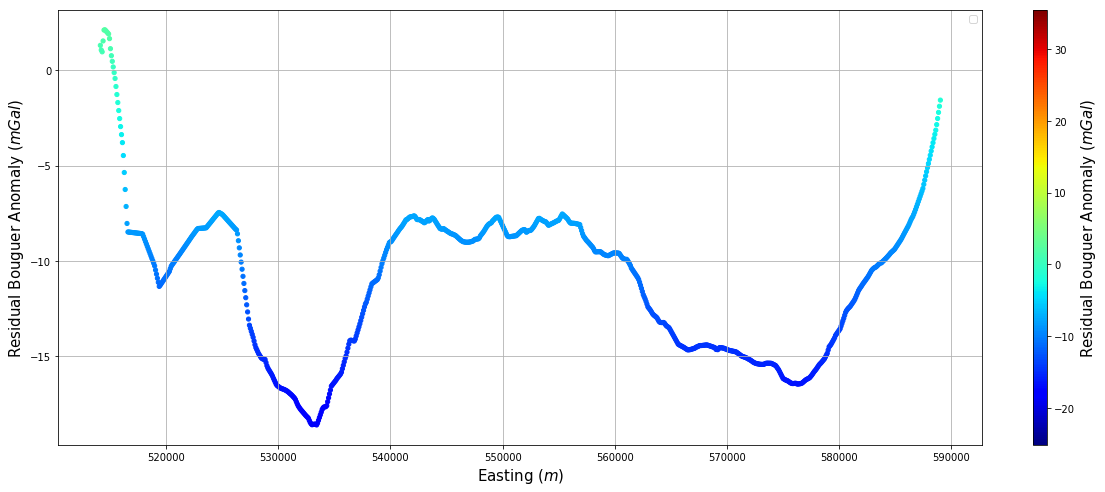

In [30]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(18,8), facecolor='w')

plt.xlabel('Easting ($m$)', fontsize = 15)
plt.ylabel('Residual Bouguer Anomaly ($mGal$)', fontsize = 15)


p1 = plt.scatter(E_perf, perfil[2], s=70.0, c=perfil[2], marker='.', cmap=plt.cm.jet,
                 vmin = target['Boug_residual'].min(), vmax = target['Boug_residual'].max())
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('Residual Bouguer Anomaly $ (mGal) $',fontsize=15, rotation = 90)
plt.legend(loc=1)
plt.grid()
#plt.savefig('figs finais/Python/perfilrobusto.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

## 9.2: perfil do ajuste polinomial robusto:

No handles with labels found to put in legend.


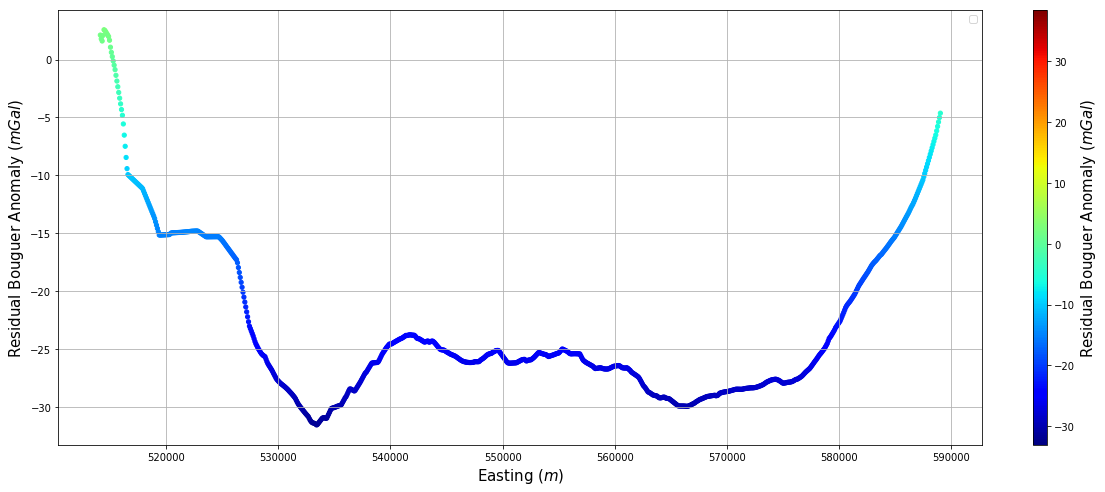

In [31]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(18,8), facecolor='w')

plt.xlabel('Easting ($m$)', fontsize = 15)
plt.ylabel('Residual Bouguer Anomaly ($mGal$)', fontsize = 15)


p1 = plt.scatter(E_perf_robusto, perfil_robusto[2], s=70.0, c=perfil_robusto[2], marker='.', cmap=plt.cm.jet,
                 vmin = target['Boug_residual_robusto'].min(), vmax = target['Boug_residual_robusto'].max())
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('Residual Bouguer Anomaly $ (mGal) $',fontsize=15, rotation = 90)
plt.legend(loc=1)
plt.grid()
plt.savefig('figs/perfilrobusto.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

# <center> Etapa 10: Mapa referenciado da Região de estudo via pacote Basemap : <center>

In [ ]:
# ------------------------- Define the center of the map -----------------------------------#  
lo0 = 0.5*( rec['Lon'].max() + rec['Lon'].min() )
la0 = 0.5*( rec['Lat'].max() + rec['Lat'].max() )

# ------- use basemap function to create the plot : ---------# 
m = Basemap(llcrnrlon=-39.0, llcrnrlat=-13.0,
            urcrnrlon=-38.0, urcrnrlat=-12.0, 
            resolution='l',projection='tmerc', 
            lon_0=lon0, lat_0=lat0,epsg=29100)

In [ ]:
# referenciando as coordenadas grav, sismica e poco ao mapa:
lons, lats = m( np.array( rec['Lon'] ), np.array( rec['Lat']) )

In [ ]:
# ------------ set figure size: ------------------------------------------#
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(18,15), facecolor='w')

#----------Drawing Lat Long: -------------#
m.drawmeridians( range( 0,360,1), labels=[0, 1, 0, 1], latmax=rec['Lat'].min() )
m.drawparallels( range(-90,90,1), labels=[1, 0, 1, 0], latmax=rec['Lat'].max() )
m.drawmapscale(-38.1, -12.85, 3, 3, 10.0, units='km', barstyle='simple', fontcolor='k')

#------------------Loading Shapefiles---------------#
#m.readshapefile('brazil_shapefile/BRA_adm0', 'Brasil', drawbounds=True, linewidth=1)
#m.readshapefile('Real/shapes/MatoGrossodoSul', 'MatoGrossodoSul', drawbounds=True, linewidth=1)
#m.readshapefile('Real/shapes/Parana', 'Parana', drawbounds=True, linewidth=1)
#m.readshapefile('shapeFiles/bacias/Limite_das_Bacias_Sedimentares', 'Limite_das_Bacias_Sedimentares', 
#                drawbounds=True, linewidth=1)



#--------------Background satellite image options-----------#

#m.shadedrelief(scale=1)
#m.etopo(scale=2)
#m.bluemarble(scale=0.5)
#m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=300, verbose=True)
m.arcgisimage(service='World_Shaded_Relief', xpixels=1000, ypixels=1000, verbose= True)


  
#---------- plot da linha sismica -------:
# plot das linhas sismicas:
for t in range(0,2,1):
    ys[t] = [lat0[t], latf[t]]
    xs[t] = [lon0[t], lonf[t]]
    m.plot(xs[t], ys[t], marker='.', linestyle='solid', linewidth=4.0,
           markersize=0, latlon=True, label=sis['LINHA'][t] ) 
    
#plot dos pocos:
for k in range(0, len(poco), 1 ):
    i = ipoco[k] 
    m.plot(poco['Lon'][i], poco['Lat'][i], marker='*', linestyle='None', linewidth=3.0,
           markersize=20.0, latlon=True, label=poco['Nome'][i] )   
plt.legend(loc=1)

#------------------Mapa da Anomalia------------------#
k = m.scatter(lons, lats, s=5.0, c=rec['Boug_residual'], marker='o', cmap=plt.cm.jet, latlon=False)
#----- colorbar specifications -----:
cbar = m.colorbar(k, location='right', size="2%", pad="2%")
cbar.set_label('Anomalia Bouguer Residual $ (mGal) $',fontsize=20, rotation=90)


#-------------Add Title-----------------------#
#plt.title('S ', fontsize=16, pad='10')
#plt.savefig('figs finais/Python/mapa_bacia_residual.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

## Salvar arquivos dos perfis em .txt

In [ ]:
# Salvando arquivo para georeferenciamento no mapa geológico de reconcavo:
g = {'Lon': perfil[0], 'Lat': perfil[1], 'Boug_residual': perfil[2], 'UTMe': E_perf, 'UTMn': N_perf}
geo_ref = pd.DataFrame(g)

### TODO: verificar o por que o pandas coloca as colunas por ordem alfabética #####

# salvando arquivo para georeferenciamento for ROD:
#geo_ref.to_csv('bouguer_recon_perfil.txt', sep = ' ', index=False)

In [ ]:
# Salvando arquivo para georeferenciamento no mapa geológico de reconcavo:
g = {'Lon': perfil_robusto[0], 'Lat': perfil_robusto[1], 'Boug_residual_robusto': perfil_robusto[2],
     'UTMe': E_perf_robusto, 'UTMn': N_perf_robusto}
geo_ref = pd.DataFrame(g)

### TODO: verificar o por que o pandas coloca as colunas por ordem alfabética #####

# salvando arquivo para georeferenciamento for ROD:
geo_ref.to_csv('bouguer_recon_perfil_robusto.txt', sep = ' ', index=False)